In [ ]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, validation_curve


In [ ]:
dtf = pd.read_csv('data/games.csv', sep=',')
dtf.head()

In [ ]:
dtf.shape

In [ ]:
target = dtf["HOME_TEAM_WINS"]

In [ ]:
#remove col date
dtf = dtf.drop("GAME_DATE_EST", 1)
dtf = dtf.drop("GAME_STATUS_TEXT", 1)


In [ ]:
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

In [ ]:
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}
#We replace missing value by column mean
for k,v in dic_cols.items():
    x = dtf[k].median()
    dtf[k].fillna(x, inplace = True)

In [ ]:
heatmap = dtf.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [ ]:
dtf = dtf.set_index("GAME_ID")
dtf = dtf.rename(columns={"HOME_TEAM_WINS":"Y"})

In [ ]:
y = "Y"
ax = dtf[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dtf, target, test_size=0.2, random_state=0)

In [ ]:
corr_matrix = dtf.copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Team correlation")

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

In [ ]:
'''
-Use different method reduction
- compute their accurancy
- Compare different accurancy and take that one has hight 
'''
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
pca.fit(X_train)

In [ ]:
#Accuracy PCA
print('Accuracy', accuracy_score(y_test, y_pred))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dtf, target, test_size=0.2, random_state=0)

In [ ]:
k_range = range(1,26)
scores = {}
scores_cross_val = {}
scores_list = []
scores_list_cross_val = []
for k in k_range :
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

In [104]:
#Use cross validation number of split in validation 5
train_score, validation_score = validation_curve(knn, X_train, y_train, 'n_neighbors', k_range, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=range(1, 26) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


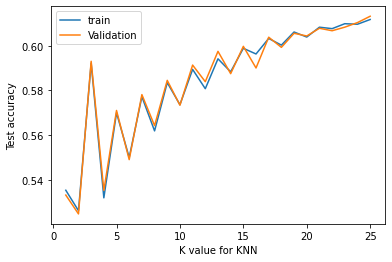

In [105]:
#Plot for cross validation
plt.plot(k_range, train_score.mean(axis=1), label="train")
plt.plot(k_range, validation_score.mean(axis=1), label="Validation")
plt.xlabel("K value for KNN")
plt.ylabel("Test accuracy")
plt.legend()

Text(0, 0.5, 'Test accuracy')

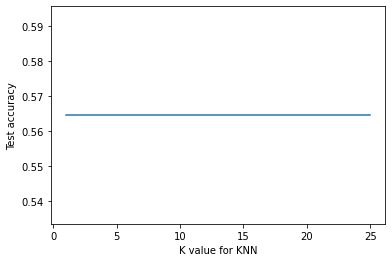

In [106]:
plt.plot(k_range, scores_list)
plt.xlabel("K value for KNN")
plt.ylabel("Test accuracy")

In [107]:
#Using Kneighbors
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.599000999000999

In [108]:
#Accuracy KNeighbors
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.5646353646353647
